epoch,train_loss,valid_loss,error_rate,time
0,0.713993,0.185680,0.057143,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.067319,0.008814,0.000000,01:00
1,0.041625,0.000315,0.000000,00:58
2,0.029516,0.000328,0.000000,00:54


This is a: cola bottle cap.
Probability it's cola: 0.9995


FileUpload(value={}, description='Upload')

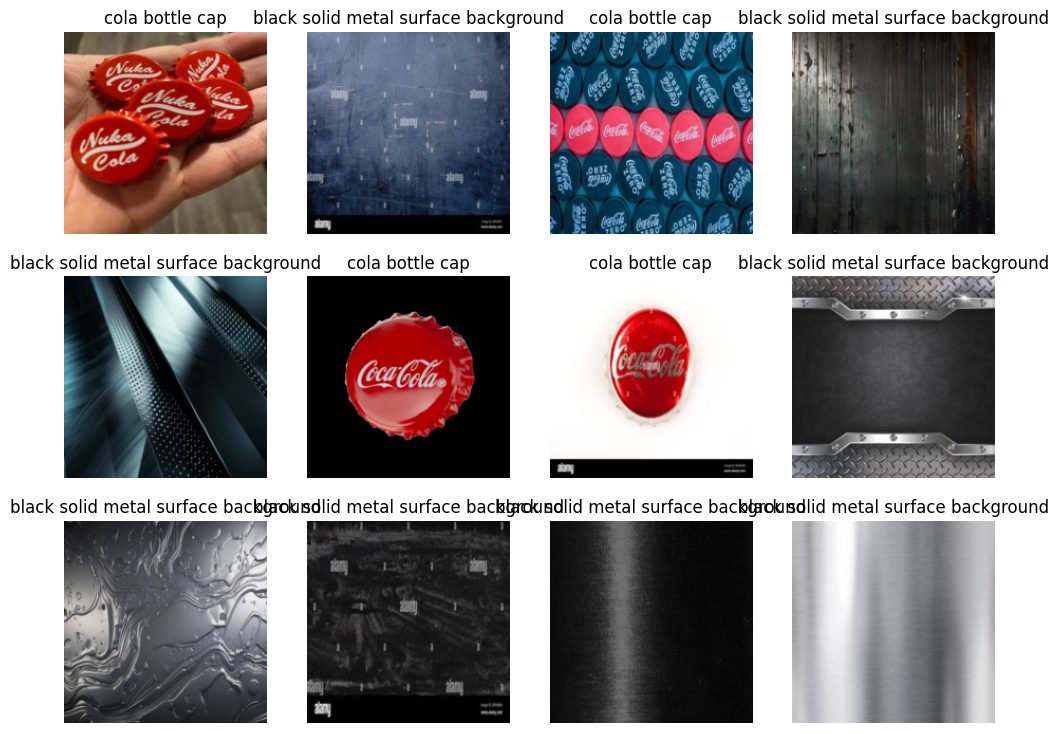

In [3]:
#!pip install -Uqq fastai 'duckduckgo_search>=6.2'
!pip install ddgs
from ddgs import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *
def search_images(keywords, max_images=50): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
import time
time.sleep(15)
urls = search_images('cola bottle cap photos', max_images=6)
urls[0]

from fastdownload import download_url
dest = 'cola.jpg'
download_url(urls[5], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

download_url(search_images('black solid metal surface background photos', max_images=6)[3], 'shelf.jpg', show_progress=False)
Image.open('shelf.jpg').to_thumb(256,256)

searches = 'cola bottle cap', 'black solid metal surface background'
path = Path('cola_or_not')
for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo', max_images=50))
  time.sleep(5)
  resize_images(path/o, max_size=400, dest=path/o)

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

cola_or_not,_,probs = learn.predict(PILImage.create('cola.jpg'))
print(f"This is a: {cola_or_not}.")
print(f"Probability it's cola: {probs[1]:.4f}")

import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader